In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_sig = pd.read_parquet('../data/train.parquet')

In [3]:
train = pd.read_csv('../data/metadata_train.csv')

In [4]:
train_sig.head(30)

,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,18,1,-19,-16,-5,19,-15,15,-1,-16,...,18,-22,12,8,13,6,-21,-15,-9,20
1,18,0,-19,-17,-6,19,-17,16,0,-15,...,17,-21,12,8,14,7,-19,-15,-8,21
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,...,16,-21,13,8,15,8,-18,-14,-8,22
3,18,1,-19,-16,-5,20,-16,16,0,-15,...,16,-21,12,8,15,8,-19,-14,-7,23
4,18,0,-19,-16,-5,20,-17,16,-2,-14,...,17,-22,12,8,15,8,-18,-14,-8,23
5,18,0,-20,-15,-4,20,-16,15,-2,-12,...,17,-22,12,8,15,8,-19,-14,-8,22
6,19,1,-18,-16,-5,20,-16,16,-1,-13,...,18,-22,12,8,15,8,-19,-14,-8,22
7,18,0,-19,-17,-7,18,-17,15,-2,-15,...,17,-22,11,7,13,6,-20,-14,-8,22
8,18,0,-20,-18,-7,18,-16,15,-2,-16,...,17,-23,11,8,13,6,-21,-14,-8,22
9,17,0,-19,-17,-7,18,-17,17,-1,-14,...,16,-22,11,7,13,6,-21,-14,-8,22


In [5]:
train.head()

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1


In [21]:
ids = train.groupby('id_measurement').sum().query('target == 3').index.tolist()

In [22]:
ids

[1,
 76,
 90,
 93,
 95,
 98,
 136,
 144,
 145,
 152,
 172,
 190,
 226,
 233,
 235,
 236,
 292,
 304,
 313,
 334,
 339,
 342,
 344,
 350,
 358,
 361,
 378,
 421,
 445,
 478,
 483,
 485,
 525,
 579,
 628,
 633,
 664,
 695,
 699,
 705,
 713,
 720,
 723,
 731,
 759,
 769,
 774,
 781,
 784,
 806,
 838,
 876,
 880,
 968,
 984,
 995,
 1010,
 1079,
 1081,
 1103,
 1115,
 1124,
 1173,
 1178,
 1190,
 1204,
 1326,
 1345,
 1351,
 1356,
 1362,
 1375,
 1381,
 1386,
 1388,
 1404,
 1407,
 1408,
 1411,
 1413,
 1416,
 1419,
 1444,
 1450,
 1451,
 1516,
 1526,
 1532,
 1544,
 1564,
 1571,
 1579,
 1589,
 1605,
 1612,
 1624,
 1644,
 1646,
 1669,
 1672,
 1673,
 1687,
 1727,
 1732,
 1750,
 1761,
 1769,
 1772,
 1788,
 1789,
 1829,
 1847,
 1910,
 1981,
 2076,
 2081,
 2092,
 2094,
 2101,
 2117,
 2126,
 2167,
 2175,
 2212,
 2213,
 2218,
 2224,
 2230,
 2248,
 2253,
 2274,
 2314,
 2322,
 2335,
 2340,
 2373,
 2436,
 2489,
 2494,
 2504,
 2540,
 2548,
 2575,
 2591,
 2597,
 2639,
 2641,
 2649,
 2673,
 2677,
 2687,
 2735,

In [23]:
ids[0]

1

In [36]:
trio_positives = train[train['id_measurement'].isin(ids)]['signal_id']

In [37]:
trio_positives

3          3
4          4
5          5
228      228
229      229
230      230
270      270
271      271
272      272
279      279
280      280
281      281
285      285
286      286
287      287
294      294
295      295
296      296
408      408
409      409
410      410
432      432
433      433
434      434
435      435
436      436
437      437
456      456
457      457
458      458
        ... 
7923    7923
7924    7924
7925    7925
7947    7947
7948    7948
7949    7949
8019    8019
8020    8020
8021    8021
8031    8031
8032    8032
8033    8033
8061    8061
8062    8062
8063    8063
8205    8205
8206    8206
8207    8207
8289    8289
8290    8290
8291    8291
8433    8433
8434    8434
8435    8435
8481    8481
8482    8482
8483    8483
8568    8568
8569    8569
8570    8570
Name: signal_id, Length: 468, dtype: int64

In [6]:
positive_samples = train[train['target']==1]

In [7]:
positive_list = positive_samples['signal_id'].values.tolist()

In [8]:
positive_list = [str(x) for x in positive_list]

In [9]:
train_sig[positive_list].head()

,3,4,5,201,202,228,229,230,270,271,...,8433,8434,8435,8481,8482,8483,8568,8569,8570,8630
0,-16,-5,19,-22,14,4,10,-23,-7,-11,...,5,12,-18,-5,20,-19,-10,18,-9,-10
1,-17,-6,19,-23,13,4,10,-24,-5,-9,...,5,12,-18,-5,21,-19,-11,18,-10,-14
2,-17,-6,19,-24,11,4,9,-24,-7,-11,...,5,13,-18,-5,20,-19,-11,18,-9,-7
3,-16,-5,20,-21,15,3,9,-23,-7,-12,...,5,12,-17,-5,21,-19,-10,19,-9,-15
4,-16,-5,20,-25,11,3,9,-23,-7,-10,...,5,12,-17,-5,21,-19,-10,19,-8,-10


In [16]:
train_sig[positive_list].columns

Index(['3', '4', '5', '201', '202', '228', '229', '230', '270', '271',
       ...
       '8433', '8434', '8435', '8481', '8482', '8483', '8568', '8569', '8570',
       '8630'],
      dtype='object', length=525)

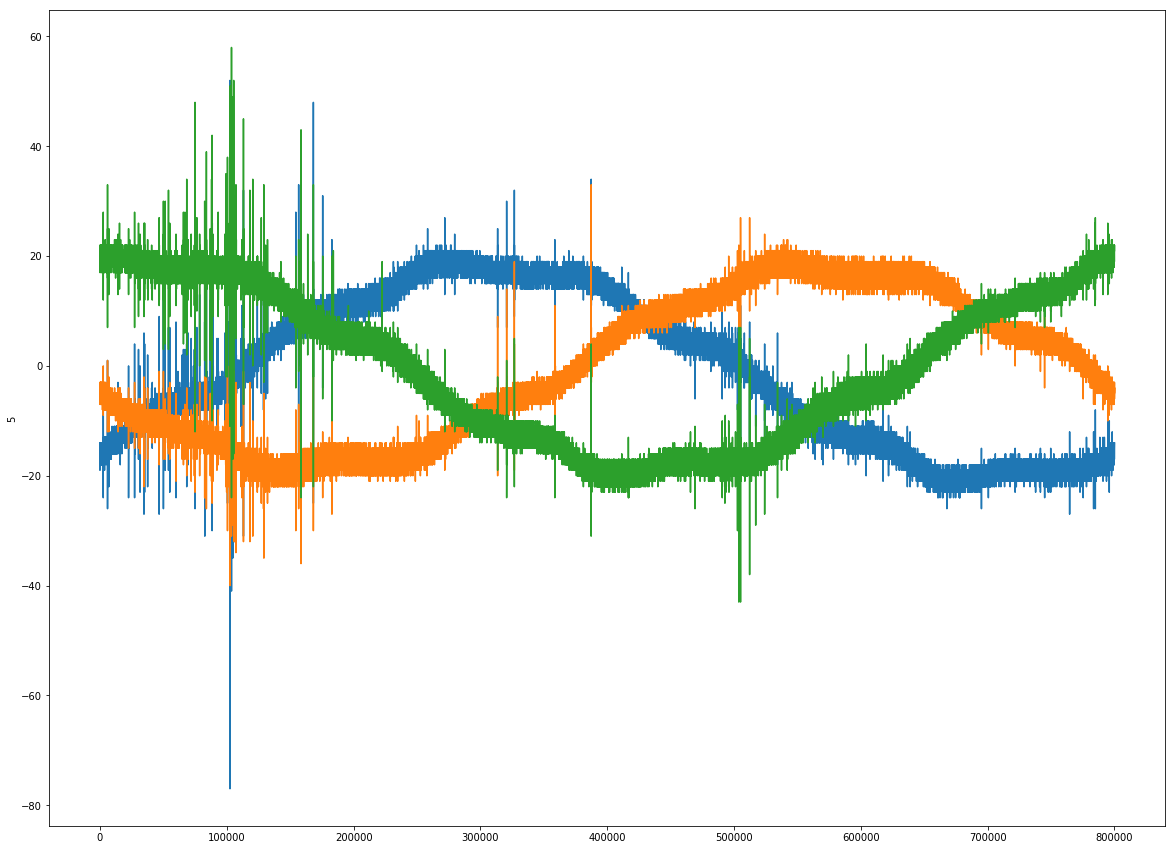

In [17]:
fig, ax = plt.subplots(figsize=(20,15))
for i in range(3,6):
    sns.lineplot(train_sig.index, train_sig[str(i)])

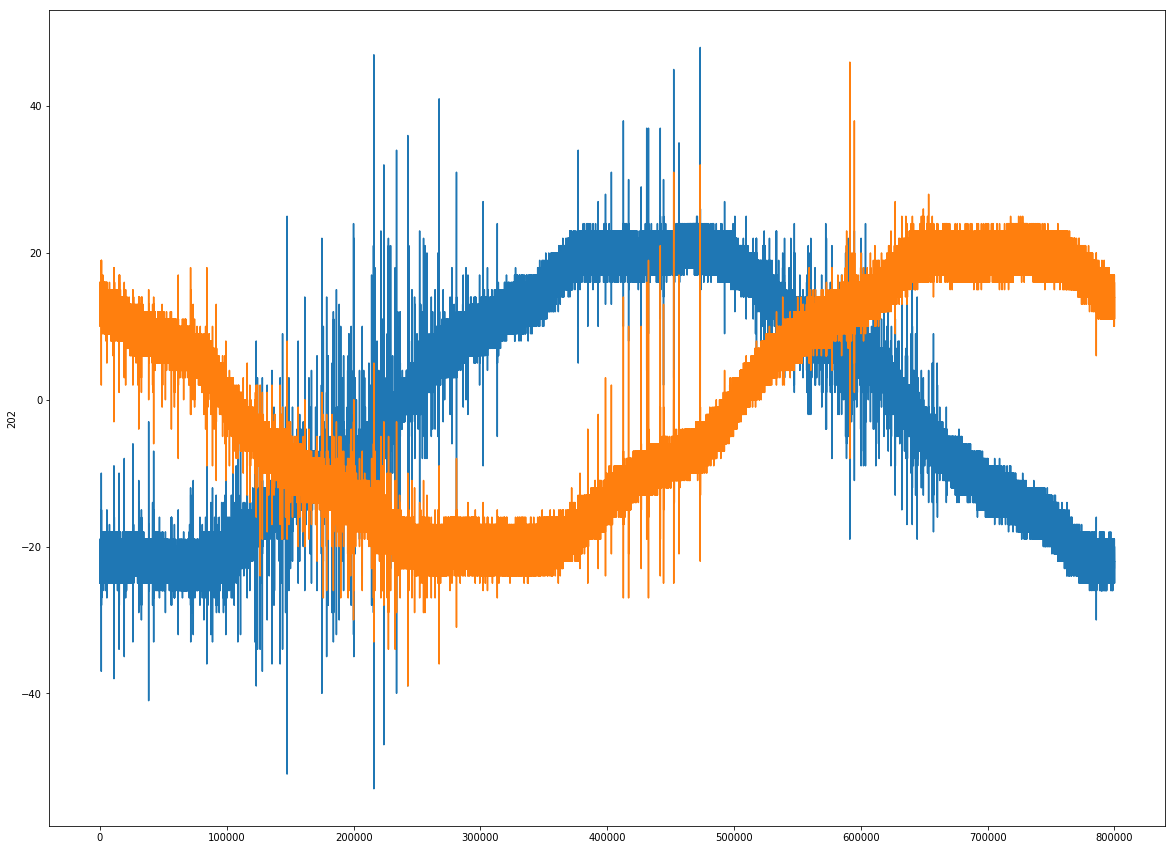

In [18]:
fig, ax = plt.subplots(figsize=(20,15))
for i in range(201,203):
    sns.lineplot(train_sig.index, train_sig[str(i)])

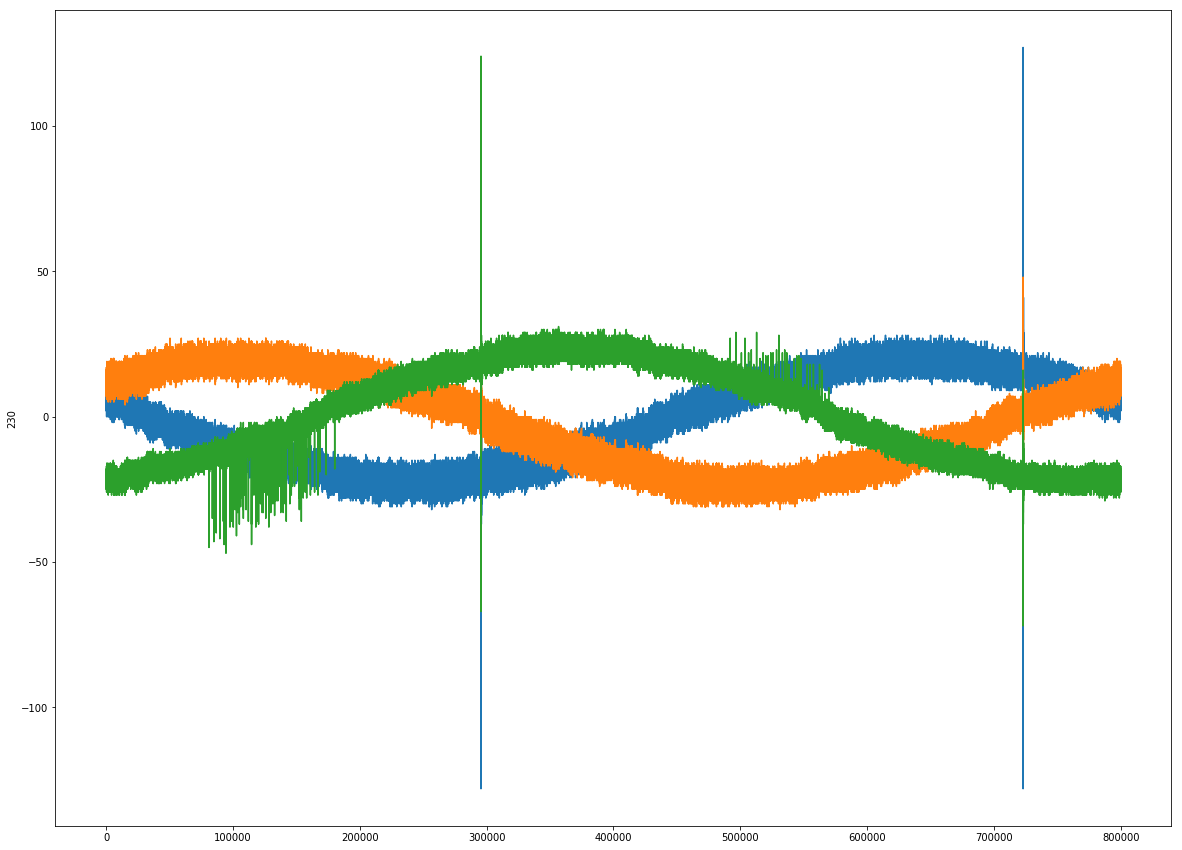

In [19]:
fig, ax = plt.subplots(figsize=(20,15))
for i in range(228,231):
    sns.lineplot(train_sig.index, train_sig[str(i)])

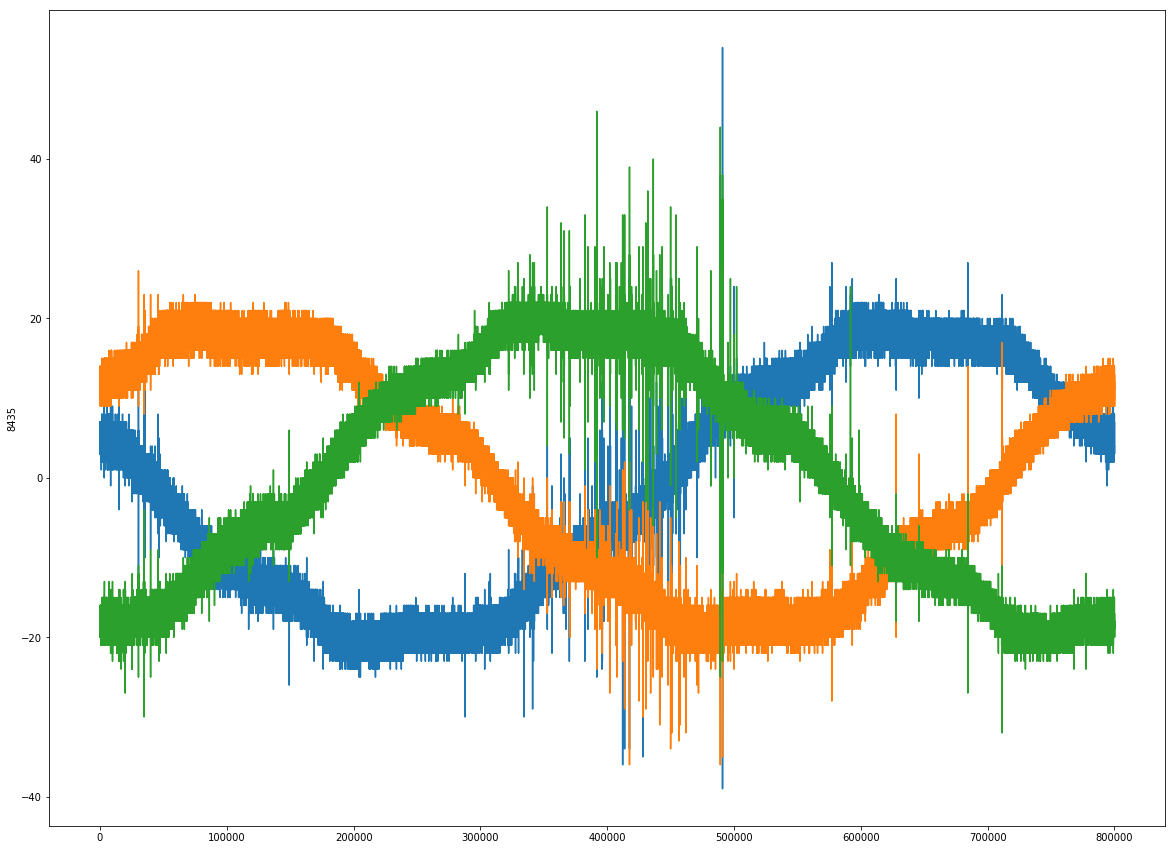

In [20]:
fig, ax = plt.subplots(figsize=(20,15))
for i in range(8433,8436):
    sns.lineplot(train_sig.index, train_sig[str(i)])

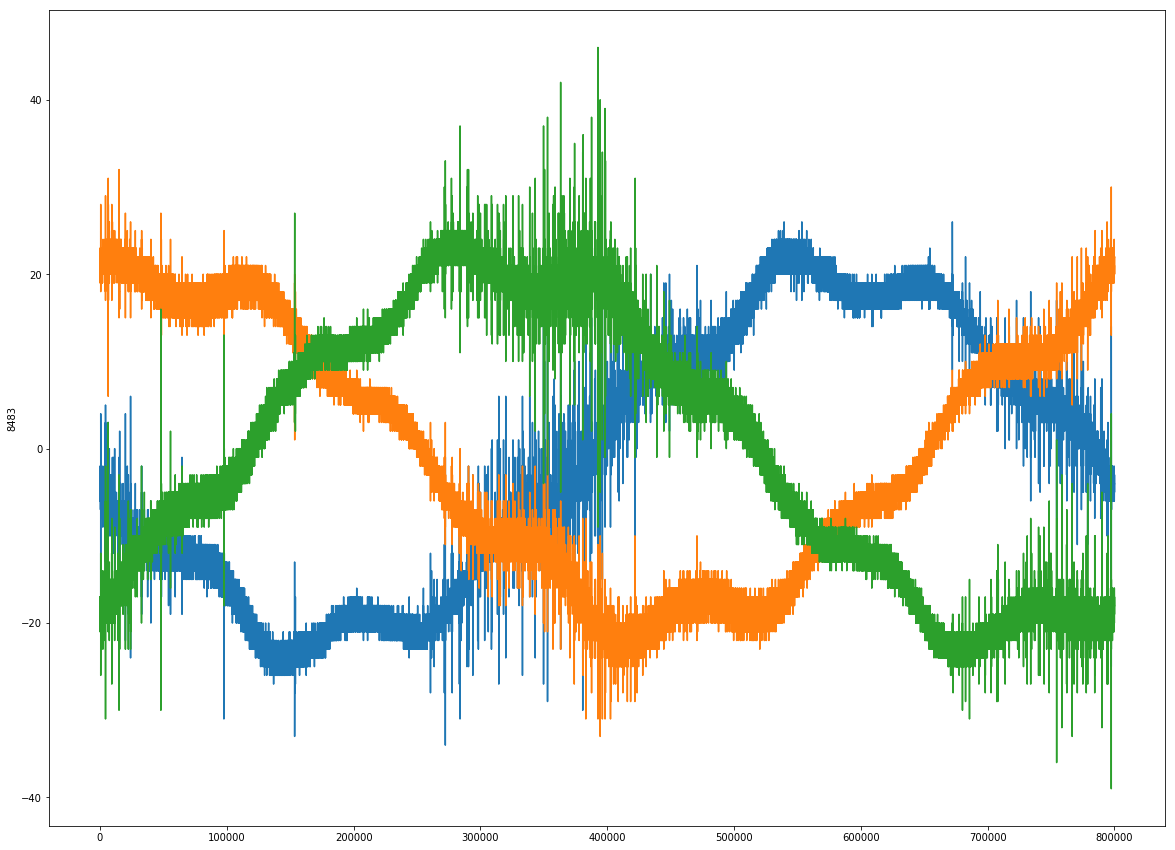

In [21]:
fig, ax = plt.subplots(figsize=(20,15))
for i in range(8481,8484):
    sns.lineplot(train_sig.index, train_sig[str(i)])

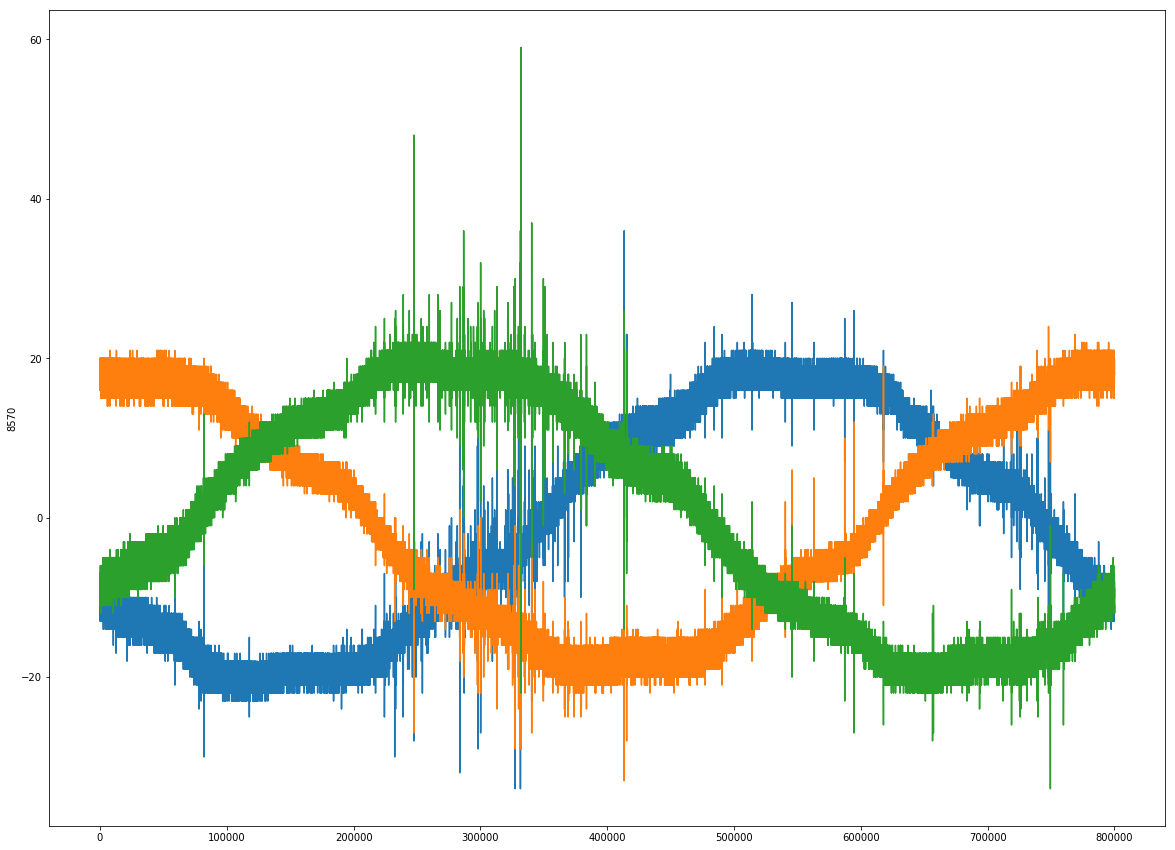

In [22]:
fig, ax = plt.subplots(figsize=(20,15))
for i in range(8568,8571):
    sns.lineplot(train_sig.index, train_sig[str(i)])

In [38]:
trio_positives

3          3
4          4
5          5
228      228
229      229
230      230
270      270
271      271
272      272
279      279
280      280
281      281
285      285
286      286
287      287
294      294
295      295
296      296
408      408
409      409
410      410
432      432
433      433
434      434
435      435
436      436
437      437
456      456
457      457
458      458
        ... 
7923    7923
7924    7924
7925    7925
7947    7947
7948    7948
7949    7949
8019    8019
8020    8020
8021    8021
8031    8031
8032    8032
8033    8033
8061    8061
8062    8062
8063    8063
8205    8205
8206    8206
8207    8207
8289    8289
8290    8290
8291    8291
8433    8433
8434    8434
8435    8435
8481    8481
8482    8482
8483    8483
8568    8568
8569    8569
8570    8570
Name: signal_id, Length: 468, dtype: int64

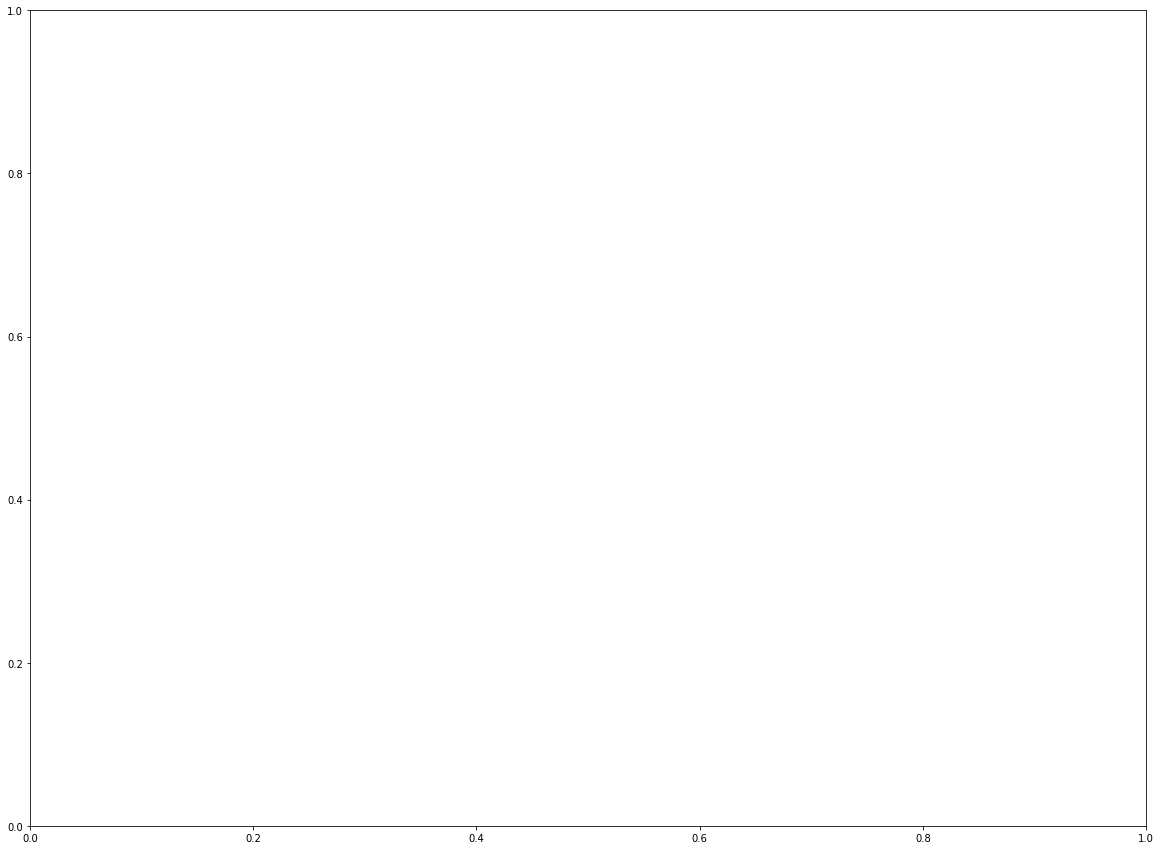

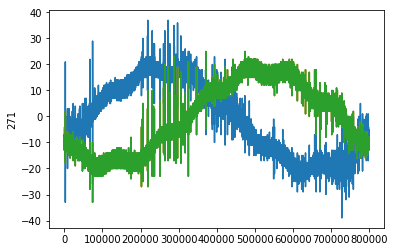

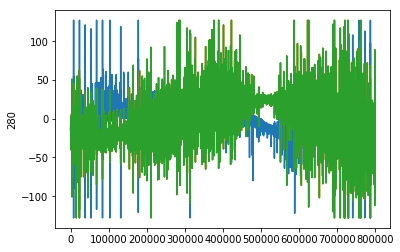

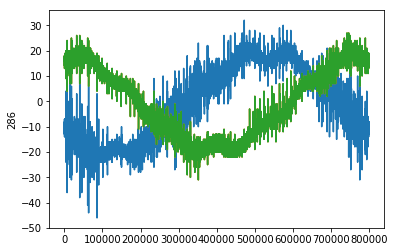

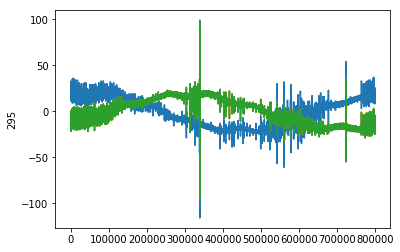

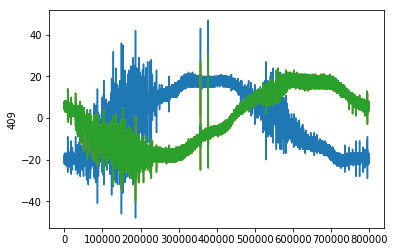

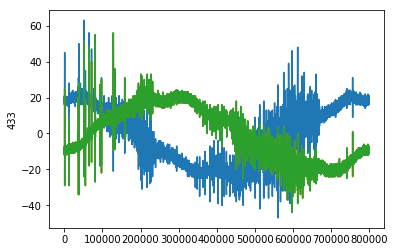

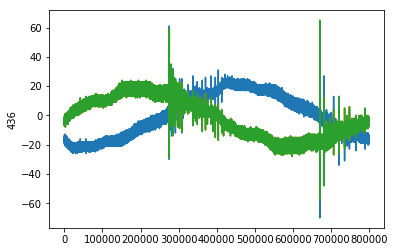

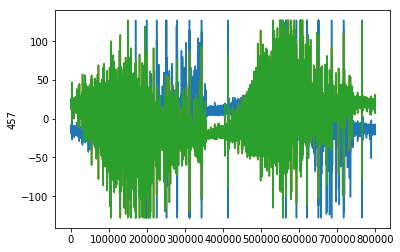

In [44]:
fig, ax = plt.subplots(figsize=(20,15))
for i in trio_positives[6:30:3]:
    plt.figure()
    sns.lineplot(train_sig.index, train_sig[str(i)])
    sns.lineplot(train_sig.index, train_sig[str(i+1)])
    sns.lineplot(train_sig.index, train_sig[str(i+1)])